In [1]:
import matplotlib.pyplot as plt
import arviz as az
import numpyro

numpyro.set_host_device_count(2)

from lqg.io import load_tracking_data

data, blob_widths = load_tracking_data(data_path="../data/")
data.shape

(6, 20, 1068, 2)

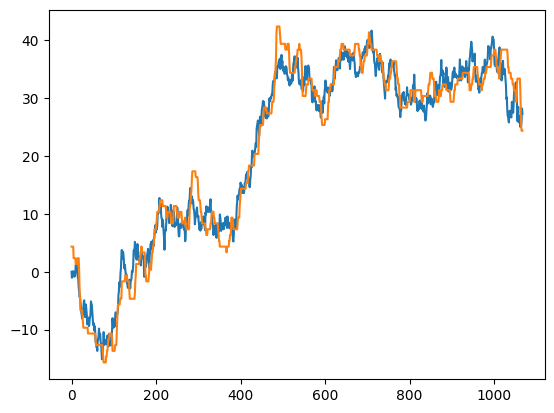

In [2]:
plt.plot(data[0, 0, :, 0])
plt.plot(data[0, 0, :, 1])

In [3]:
from lqg.infer import infer
from lqg.infer.models import lifted_common_model as common_lqg_model
from lqg.tracking import BoundedActor, SubjectiveActor

models = {"BoundedActor": BoundedActor, "SubjectiveActor": SubjectiveActor}
results = {}

In [4]:
for model_name, model in models.items():
    results[model_name] = az.from_netcdf(f"../results/{model_name}-2.nc")

FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = '../results/BoundedActor-2.nc', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

arviz - WARNING - Shape validation failed: input_shape: (1, 5000), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 5000), minimum_shape: (chains=2, draws=4)


           mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
sigma_0   8.000  0.246   7.535    8.461      0.003    0.002    5294.0   
sigma_1   9.394  0.300   8.833    9.936      0.004    0.003    5637.0   
sigma_2  12.099  0.443  11.264   12.919      0.006    0.004    6218.0   
sigma_3  18.689  0.712  17.343   20.009      0.010    0.007    5057.0   
sigma_4  31.810  1.474  29.176   34.574      0.021    0.015    5156.0   
sigma_5  40.913  1.789  37.591   44.219      0.024    0.017    5544.0   

         ess_tail  r_hat  
sigma_0    3750.0    NaN  
sigma_1    3696.0    NaN  
sigma_2    3725.0    NaN  
sigma_3    3734.0    NaN  
sigma_4    3418.0    NaN  
sigma_5    4091.0    NaN  
           mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
sigma_0  10.974  0.331  10.329   11.575      0.005    0.004    4268.0   
sigma_1  12.131  0.396  11.442   12.904      0.006    0.004    4066.0   
sigma_2  15.382  0.603  14.250   16.499      0.010    0.007    3697.0   
sigma_3

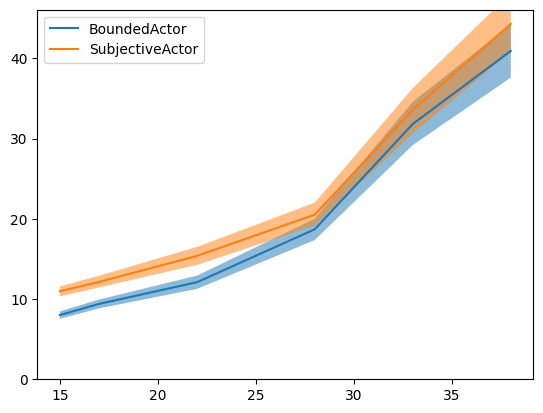

In [7]:
for model_name, inference_data in sorted(results.items()):
    summary = az.summary(inference_data.posterior, var_names=[f"sigma_{i}" for i in range(6)])
    print(summary)

    plt.plot(blob_widths, summary["mean"], label=model_name)
    plt.fill_between(blob_widths, summary["hdi_3%"], summary["hdi_97%"], alpha=0.5)
    plt.ylim(0, )
plt.legend()